In [1]:

# coding: utf-8

import tweepy
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

pd.options.display.max_columns = 50
pd.options.display.max_rows= 50
pd.options.display.width= 120

consumer_key ="cf6yoFiRnumb8YCgAc7i2890Z"
consumer_secret = "V4cP4UqqoYjiyxV8gsK9n91Bztg4qCowhFGLcjngTYBX6BfbmO"

auth = tweepy.OAuthHandler(consumer_key=consumer_key, consumer_secret=consumer_secret)


access_token = "3377301250-JkIbLxJp5oYnJHCJ3SVvBaOezBgTNGTSfyFGDiV"
access_token_secret = "TDaatB09DV6RjStolXxMayzAe2o836U280xwyI4Z173yj"
auth.set_access_token(access_token, access_token_secret)

# Creation of the actual interface, using authentication
api = tweepy.API(auth)

#Switching to application authentication
auth = tweepy.AppAuthHandler(consumer_key, consumer_secret)

#Setting up new api wrapper, using authentication only
api = tweepy.API(auth, wait_on_rate_limit=True,wait_on_rate_limit_notify=True)
 
#Error handling
if (not api):
    print ("Problem Connecting to API")
else:
    print "Autenticado"

Autenticado


In [2]:
i= 0
all_tweets = []
for tweet in tweepy.Cursor(api.search,count=100,lang="es",geocode="-34.5916734896,-58.3918617027,3mi").items():
    i +=1
    if i % 1000 == 0:
        print i
    all_tweets.append(tweet)
        

print len(all_tweets)

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
Rate limit reached. Sleeping for: 171
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
Rate limit reached. Sleeping for: 99
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
103000
104000
105000
106000


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python2.7/dist-packages/IPython/core/ultratb.py", line 1132, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/usr/local/lib/python2.7/dist-packages/IPython/core/ultratb.py", line 313, in wrapped
    return f(*args, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/IPython/core/ultratb.py", line 358, in _fixed_getinnerframes
    records = fix_frame_records_filenames(inspect.getinnerframes(etb, context))
  File "/usr/lib/python2.7/inspect.py", line 1049, in getinnerframes
    framelist.append((tb.tb_frame,) + getframeinfo(tb, context))
  File "/usr/lib/python2.7/inspect.py", line 1009, in getframeinfo
    filename = getsourcefile(frame) or getfile(frame)
  File "/usr/lib/python2.7/inspect.py", line 454, in getsourcefile
    if hasattr(getmodule(object, filename), '__loader__'):
  File "/usr/lib/python2.7/inspect.py", line 497, in getmodule
    f = getabsfile(module)
  File

IndexError: string index out of range

In [5]:
places_dict = {}
loc = {}
print all_tweets[8].text
geos = 0

for tweet in all_tweets:
    if tweet.user.location != None:
        loc[tweet.user.location] = 1 if not loc.has_key(tweet.user.location) else loc[tweet.user.location] +1
    if tweet.place != None:
        places_dict[tweet.place.country] = 1 if not places_dict.has_key(tweet.place.name) else places_dict[tweet.place.name] + 1
    if tweet.user.geo_enabled:
        geos +=1

print "La cantidad total de tweets: "  + str(len(all_tweets))
print "La cantidad de usarios con geolocalizacion " + str(geos) + ", el " + str(100*float(geos)/(len(all_tweets)))

canti = 20
for w in sorted(loc, key=loc.get, reverse=True)[:canti]:
    print w, loc[w]





@FloorCosta_ @JuaniRichiello 
Liceo
Anteojos
Biología
Rugby
La cantidad total de tweets: 106623
La cantidad de usarios con geolocalizacion 61493, el 57.6732975062
Buenos Aires, Argentina 37211
 19324
Buenos Aires 6570
Argentina 2884
Ciudad Autónoma de Buenos Aire 1003
Buenos Aires  888
Buenos Aires, Argentina. 873
Buenos Aires - Argentina 814
buenos aires 765
Córdoba, Argentina 729
Buenos Aires, Argentina  704
Buenos Aires Argentina 439
La Plata, Argentina 353
argentina 340
Rosario, Argentina 303
Buenos Aires. 289
Argentina, Buenos Aires 286
Mar del Plata, Argentina 233
Buenos aires 208
Santa Fe, Argentina 204


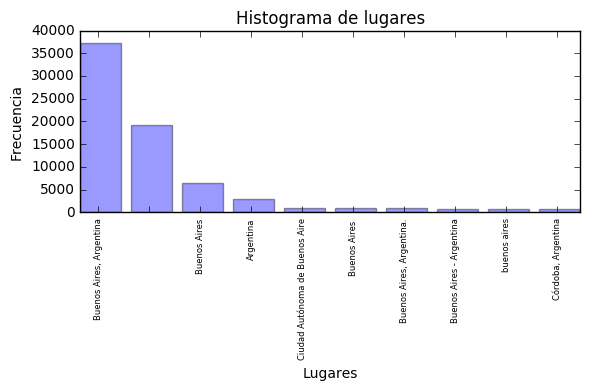

In [4]:
plt.title("Histograma de lugares")
plt.xlabel("Lugares")
plt.ylabel("Frecuencia")

index = np.arange(len(loc.keys()))
bar_width = 0.35


cant = 10
valores = sorted(loc.values(),reverse=True)
claves = sorted(loc, key=loc.get,reverse=True)

opacity = 0.4
plt.xticks(index + bar_width, claves[:cant], size=6, rotation="vertical")
plt.bar(range(cant),valores[:cant],alpha=opacity,color='b',)
plt.tight_layout()
plt.show()

In [6]:
import json
cor = []
for tweet in all_tweets:
    if tweet.user.location == u'Córdoba, Argentina':
        cor.append(tweet)

#print dir(cor[0])   
ids = []
for c in cor:
    temp_id = c.entities['user_mentions'][0]['id']
    ids.append(temp_id)
    tuser = api.get_user(temp_id)
    print tuser.location
    
print temp.location
#print  json.dumps(cor[0]._json,sort_keys=False,indent=2, separators=(',', ': '))

Buenos Aires
Buenos Aires, Argentina
Buenos Aires, Argentina
Buenos Aires, Argentina
Buenos Aires, Argentina
Buenos Aires, Argentina
Buenos Aires , Argentina
Buenos Aires, Argentina
Buenos Aires, Argentina
Buenos Aires, Argentina
Buenos Aires, Argentina
Buenos Aires, Argentina
Buenos Aires, Argentina


IndexError: list index out of range

In [127]:
total = 0
for w in sorted(tusers, key=tusers.get, reverse=True):
    print w, tusers[w]
    total +=tusers[w]
print total

Buenos Aires, Argentina 482
Buenos Aires 178
Buenos Aires  28
Buenos Aires, Argentina. 19
Buenos Aires - Argentina 9
 8
Argentina, Buenos Aires 7
buenos aires 6
Buenos Aires .. 5
Buenos aires 4
Buenos Aires, Capital Federal. 4
Buenos Aires Argentina 3
Argentina - Buenos Aires 3
Buenos Aires, Argentina  3
 Buenos Aires, Argentina 3
Ciudad Buenos Aires Argentina 2
Baires 2
Cdad Autónoma de Buenos Aires 2
BUENOS AIRES 2
La Boca, Buenos Aires. 2
Buenos Aires,Argentina 2
Buenos Aires (Argentina) 1
 BAires. 1
myanmar 1
Buenos Aires, Argentina.  1
 Buenos Aires-ARGENTINA. 1
buenos aires. 1
Argentina 1
Argentina, Buenos Aires. 1
José C. Paz, Buenos Aires 1
Buenos Aires-Argentina. 1
Luján, Argentina 1
Buenos Aires City. 1
Jose C Paz, Buenos Aires 1
buenos aires,argentina 1
Buenos Aires; Argentina. 1
Buenos Aires. 1
La Boca, Buenos Aires 1
Buenos Aires City 1
 Colombia 1
Pcia. Buenos Aires 1
Barracas, Buenos Aires 1
Buenos Aires , Argentina 1
796


In [117]:
import json
cor2 = []
for tweet in all_tweets:
    if tweet.user.location == u'':
        cor2.append(tweet)
print len(cor2)
#print dir(cor[0])   
ids2 = []

tusers = {}
sinMenciones = 0
sin = 0
for c in cor2:
    if c.entities != None:
        if len(c.entities['user_mentions']) != 0:
            temp_id = c.entities['user_mentions'][0]['id']
            ids.append(temp_id)
            tuser = api.get_user(temp_id)
            tusers[tuser.location] = 1 if not tusers.has_key(tuser.location) else tusers[tuser.location] +1
        else:
            sin +=1
    else:
        sinMenciones +=1

print sinMenciones
#print  json.dumps(cor[0]._json,sort_keys=False,indent=2, separators=(',', ': '))

1251
Rate limit reached. Sleeping for: 419


KeyboardInterrupt: 